In [1]:
import os
import sys
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, Draw, rdFMCS, Descriptors
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = 250,250

In [3]:
input_dir = f"outputs_6-4_ABCG2_affinity_distribution"
output_dir = "outputs_6-5_ABCG2_drawing_hit_molecules"
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

In [4]:
df_raw = pd.read_csv(os.path.join(input_dir, "sorafenib_translation_COMA.csv"))

idx_hit = (df_raw["TANIMOTO"] > 0.4) & (df_raw["affinity(ABCG2)"] < 4.7)
df_hit = df_raw[idx_hit].drop_duplicates(ignore_index=True)
df_hit = df_hit.sort_values(by="affinity(ABCG2)", ignore_index=True)
df_hit

,source,target,TANIMOTO,affinity(BRAF),affinity(ABCG2)
0,CNC(=O)C1=CC(OC2=CC=C(NC(=O)NC3=CC=C(Cl)C(C(F)...,CNC(=O)C1=CC(NC(=O)C2=CC=C(OC(F)(F)F)C=C2)=CC=N1,0.476190,6.200153,4.088666
1,CNC(=O)C1=CC(OC2=CC=C(NC(=O)NC3=CC=C(Cl)C(C(F)...,CNC(=O)C1=CC(NC(=O)C2=CC=C(OC(F)(F)F)C(F)=C2)=...,0.405797,6.362442,4.098802
2,CNC(=O)C1=CC(OC2=CC=C(NC(=O)NC3=CC=C(Cl)C(C(F)...,CNC(=O)C1=CC(NC(=O)C2=CC=CC(OC(F)(F)F)=C2)=CC=N1,0.432836,6.344893,4.158764
3,CNC(=O)C1=CC(OC2=CC=C(NC(=O)NC3=CC=C(Cl)C(C(F)...,CNC(=O)C1=CC(C2=CC=C(NC(=O)C3=CC=CC=C3)C(C(F)(...,0.411765,6.143946,4.212416
4,CNC(=O)C1=CC(OC2=CC=C(NC(=O)NC3=CC=C(Cl)C(C(F)...,CNC(=O)C1=CC(C2=CC=C(NC(=O)C3=CC=C(OC(F)(F)F)C...,0.469697,6.456139,4.237708
5,CNC(=O)C1=CC(OC2=CC=C(NC(=O)NC3=CC=C(Cl)C(C(F)...,CNC(=O)C1=CC(C2=CC=C(NC(=O)C3=CC=CC=C3)C=C2C(F...,0.484848,6.199878,4.331082
6,CNC(=O)C1=CC(OC2=CC=C(NC(=O)NC3=CC=C(Cl)C(C(F)...,CNC(=O)C1=CC(C2=CC=C(NC(=O)C3=CC=CC=C3C(F)(F)F...,0.476923,5.845850,4.339190
7,CNC(=O)C1=CC(OC2=CC=C(NC(=O)NC3=CC=C(Cl)C(C(F)...,CNC(=O)C1=CC(NC(=O)C2=CC=C(OC(F)(F)F)C(Cl)=C2)...,0.462687,6.231882,4.346769
8,CNC(=O)C1=CC(OC2=CC=C(NC(=O)NC3=CC=C(Cl)C(C(F)...,CNC(=O)C1=CC(C2=CC=C(NC(=O)C3=CC=CC(OC(F)(F)F)...,0.428571,6.585053,4.373630
9,CNC(=O)C1=CC(OC2=CC=C(NC(=O)NC3=CC=C(Cl)C(C(F)...,CNC(=O)C1=CC(OC2=CC=C(NC(=O)C3=CC=CC=C3)C=C2C(...,0.402778,6.437242,4.415955


In [5]:
mol_sorafenib = Chem.MolFromSmiles(df_hit.iloc[0,0])
mols = [Chem.MolFromSmiles(df_hit.iloc[i,1]) for i in range(len(df_hit))]

In [6]:
def view_difference(mol1, mol2, filepath=None):
    ## most common structure
    mcs = rdFMCS.FindMCS([mol1,mol2], completeRingsOnly=True)
    mcs_mol = Chem.MolFromSmarts(mcs.smartsString)
    ## 1st highlight
    match1 = mol1.GetSubstructMatch(mcs_mol)
    target_atm1 = []
    for atom in mol1.GetAtoms():
        if atom.GetIdx() not in match1:
            target_atm1.append(atom.GetIdx())
    ## 2nd highlight
    match2 = mol2.GetSubstructMatch(mcs_mol)
    target_atm2 = []
    for atom in mol2.GetAtoms():
        if atom.GetIdx() not in match2:
            target_atm2.append(atom.GetIdx())
    ## coordinate
    AllChem.Compute2DCoords(mcs_mol)
    _ = AllChem.GenerateDepictionMatching2DStructure(mol1, mcs_mol)
    _ = AllChem.GenerateDepictionMatching2DStructure(mol2, mcs_mol)
    ## plot
    fig, ax = plt.subplots(1,2,figsize=(10,4))
    for i, (mol, target_atm) in enumerate(zip([mol1, mol2], [target_atm1, target_atm2])):
        ax[i].imshow(Draw.MolToImage(mol, size=(1000,1000), highlightAtoms=target_atm))
        ax[i].axis('off')
    plt.tight_layout()
    if filepath is not None:
        plt.savefig(filepath, dpi=600)
    else:
        plt.show()

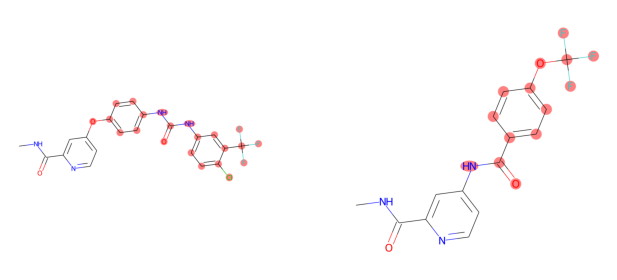

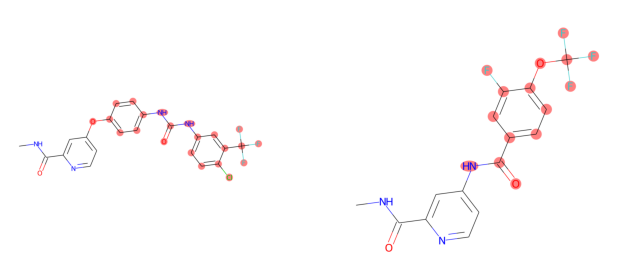

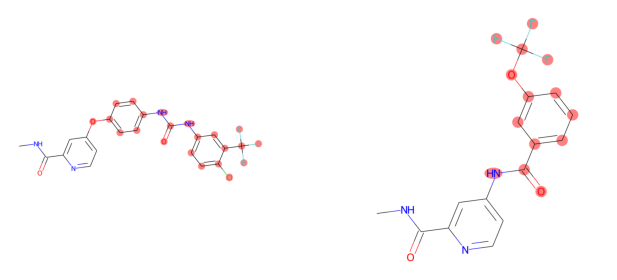

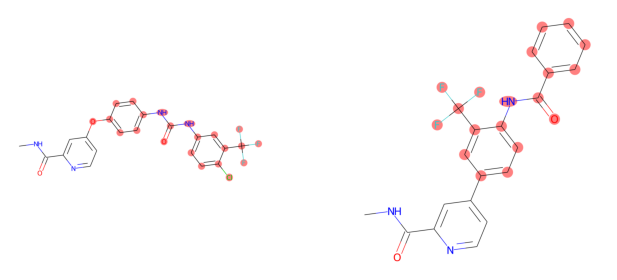

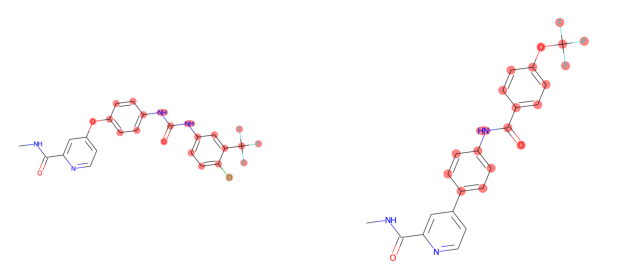

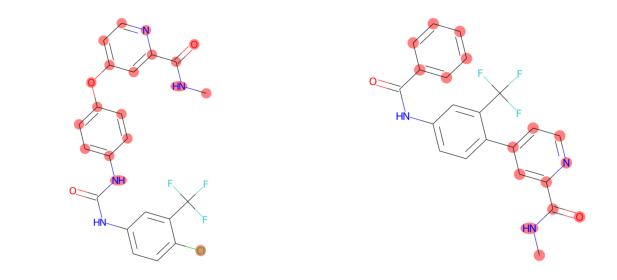

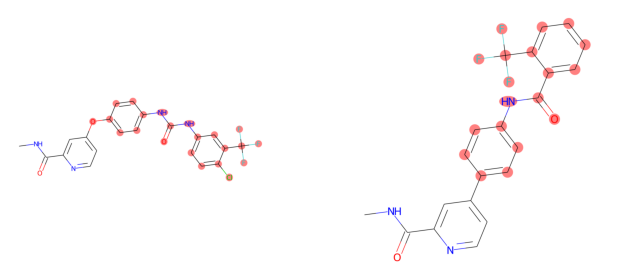

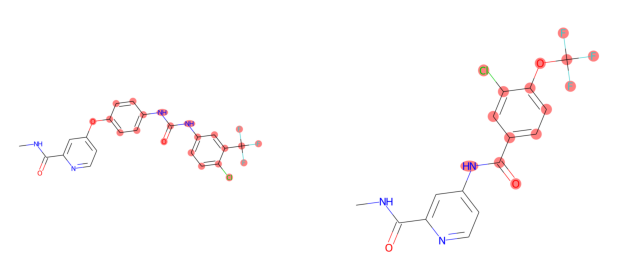

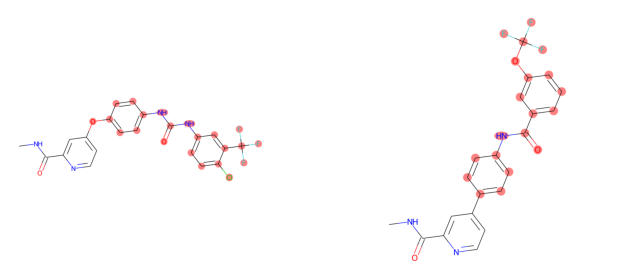

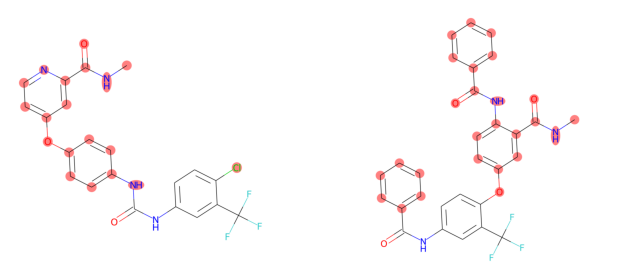

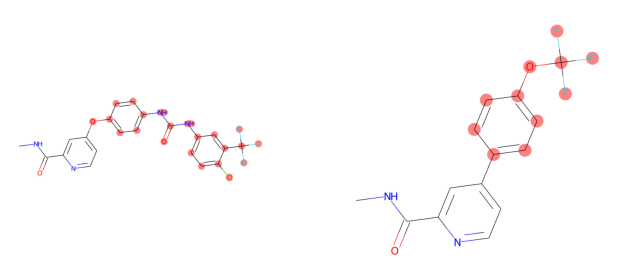

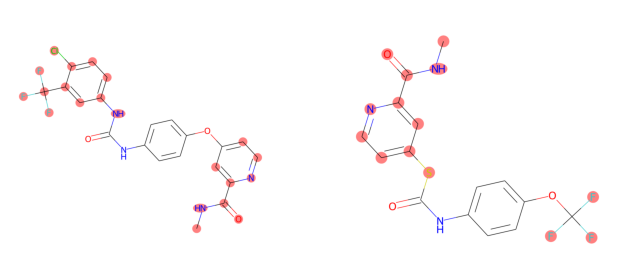

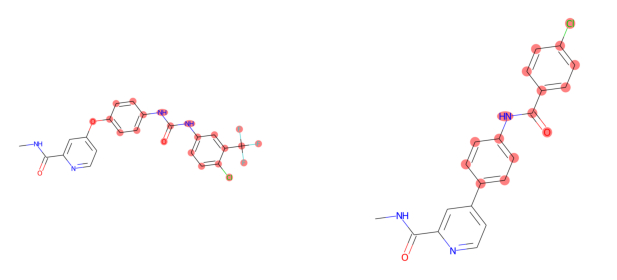

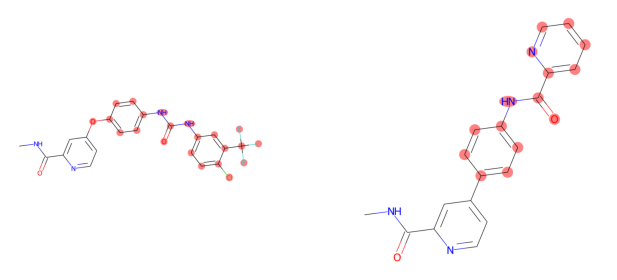

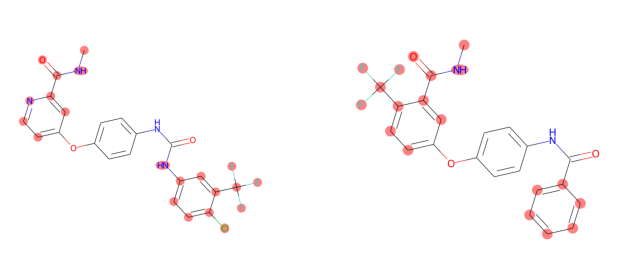

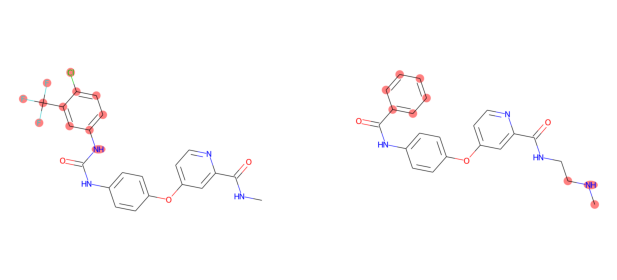

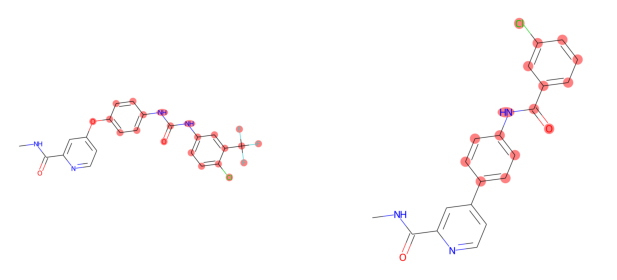

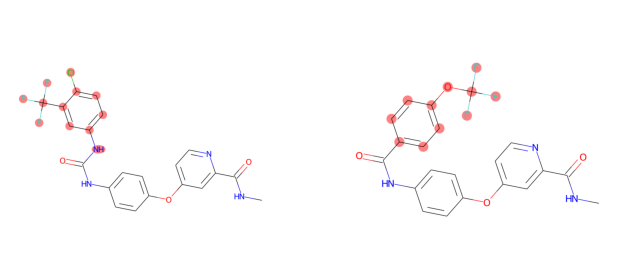

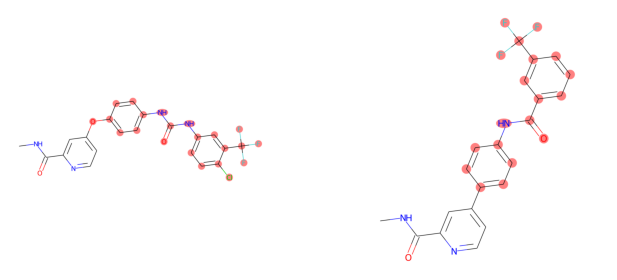

In [7]:
for mol in mols:
    view_difference(mol_sorafenib, mol)

In [8]:
def draw_molecule(smi, show_charge=False, filepath=None):
    mol = Chem.MolFromSmiles(smi)
    ## Include a Calculation
    if show_charge:
        AllChem.ComputeGasteigerCharges(mol)    
        for at in mol.GetAtoms():
            lbl = '%.2f'%(at.GetDoubleProp("_GasteigerCharge"))
            at.SetProp('atomNote',lbl)
    ## plot
    fig, ax = plt.subplots(1,1,figsize=(8,8))
    ax.imshow(Draw.MolToImage(mol, size=(1000,1000)))
    ax.axis('off')
    plt.tight_layout()
    if filepath is not None:
        plt.savefig(filepath, dpi=600)
    else:
        plt.show()

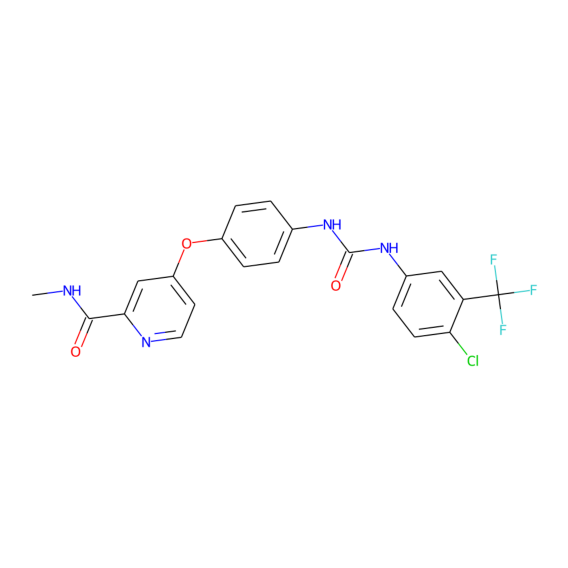

In [11]:
draw_molecule(df_hit.iloc[0,0], filepath=os.path.join(output_dir, "sorafenib.png"))
with open(os.path.join(output_dir, "sorafenib.smi"), 'w') as fout:
        fout.write(f"{df_hit.iloc[0,0]}\n")

similarity: 0.406
affinity(ABCG2): 4.099
affinity(BRAF): 6.362
similarity: 0.433
affinity(ABCG2): 4.159
affinity(BRAF): 6.345
similarity: 0.412
affinity(ABCG2): 4.212
affinity(BRAF): 6.144
similarity: 0.470
affinity(ABCG2): 4.238
affinity(BRAF): 6.456
similarity: 0.485
affinity(ABCG2): 4.331
affinity(BRAF): 6.200
similarity: 0.477
affinity(ABCG2): 4.339
affinity(BRAF): 5.846
similarity: 0.463
affinity(ABCG2): 4.347
affinity(BRAF): 6.232
similarity: 0.429
affinity(ABCG2): 4.374
affinity(BRAF): 6.585
similarity: 0.403
affinity(ABCG2): 4.416
affinity(BRAF): 6.437
similarity: 0.443
affinity(ABCG2): 4.436
affinity(BRAF): 6.117
similarity: 0.470
affinity(ABCG2): 4.475
affinity(BRAF): 6.083
similarity: 0.422
affinity(ABCG2): 4.567
affinity(BRAF): 6.170
similarity: 0.419
affinity(ABCG2): 4.583
affinity(BRAF): 6.249
similarity: 0.462
affinity(ABCG2): 4.610
affinity(BRAF): 6.136
similarity: 0.456
affinity(ABCG2): 4.632
affinity(BRAF): 6.456
similarity: 0.403
affinity(ABCG2): 4.642
affinity(BRAF)

IndexError: single positional indexer is out-of-bounds

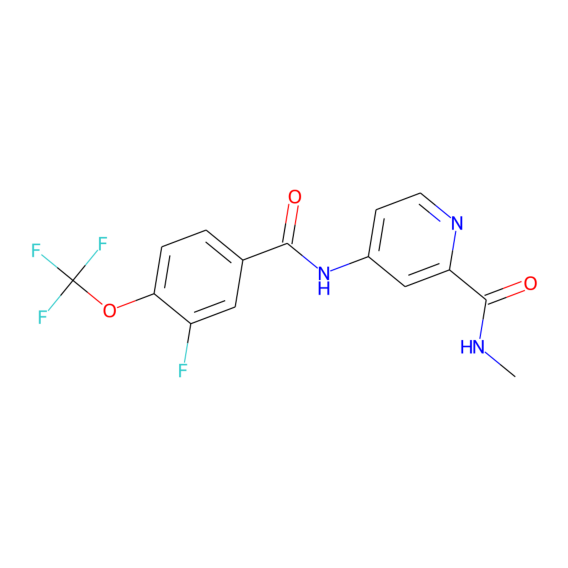

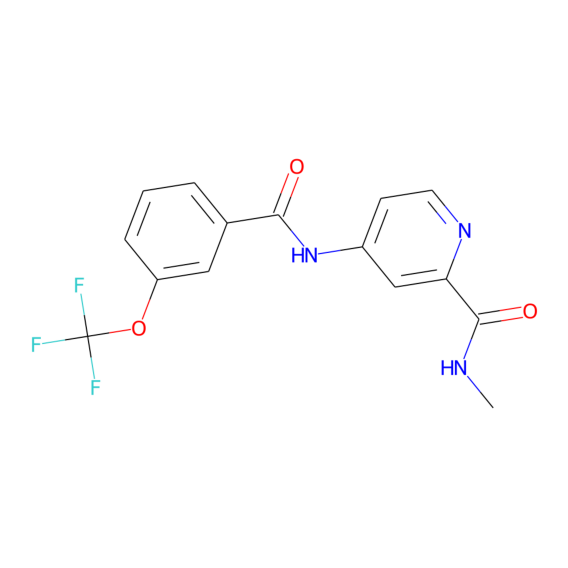

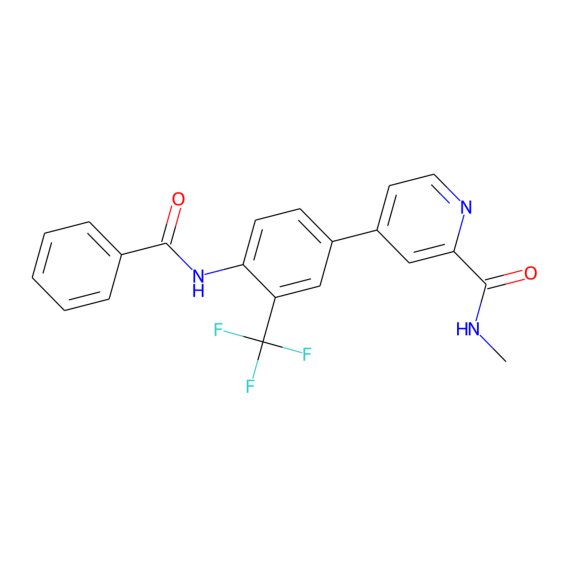

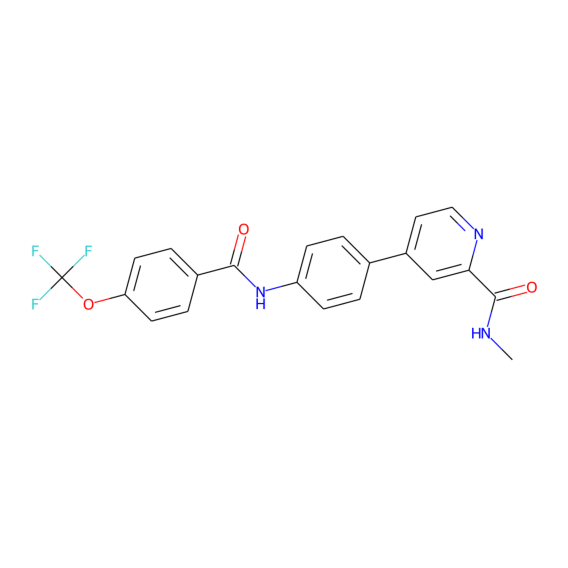

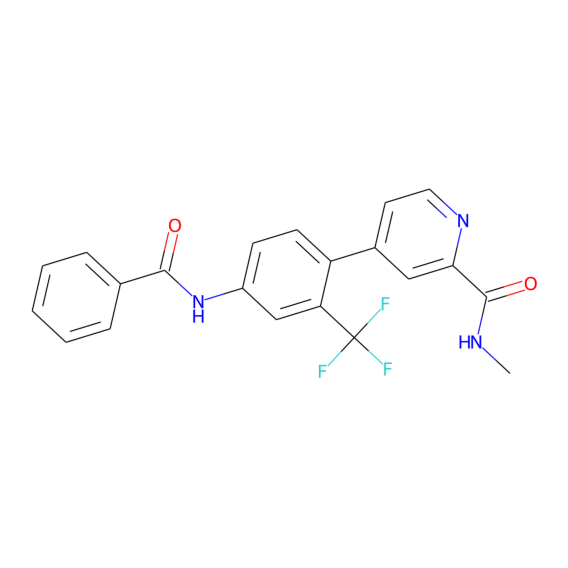

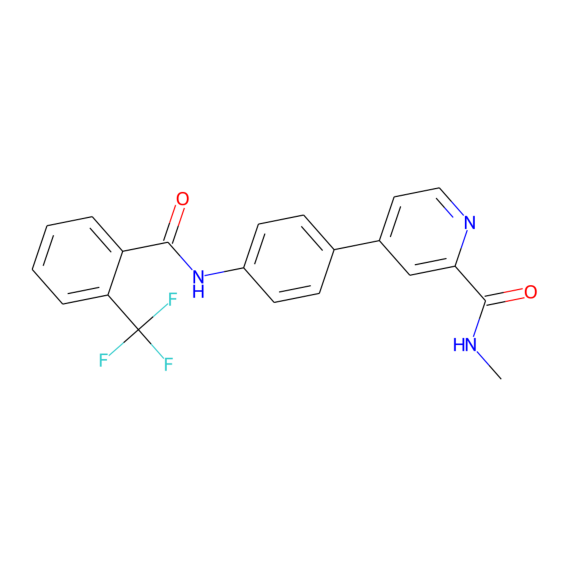

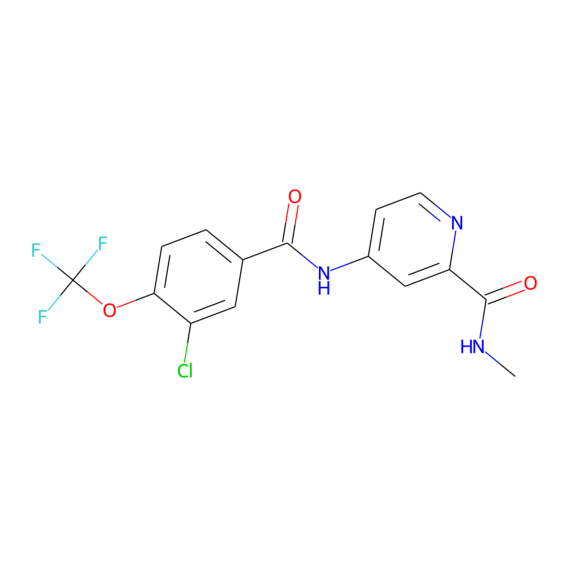

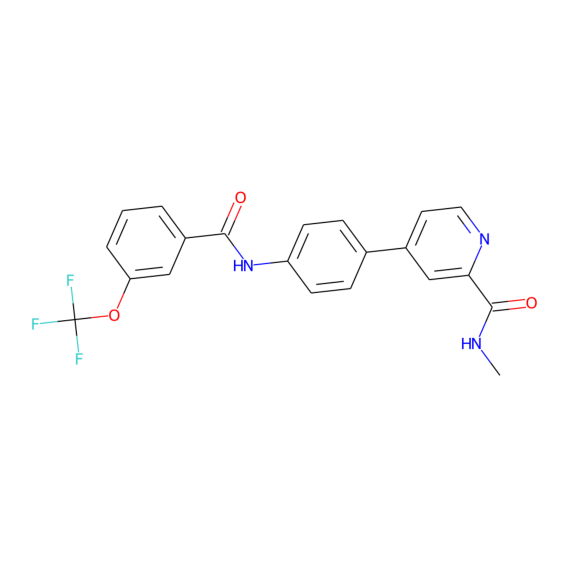

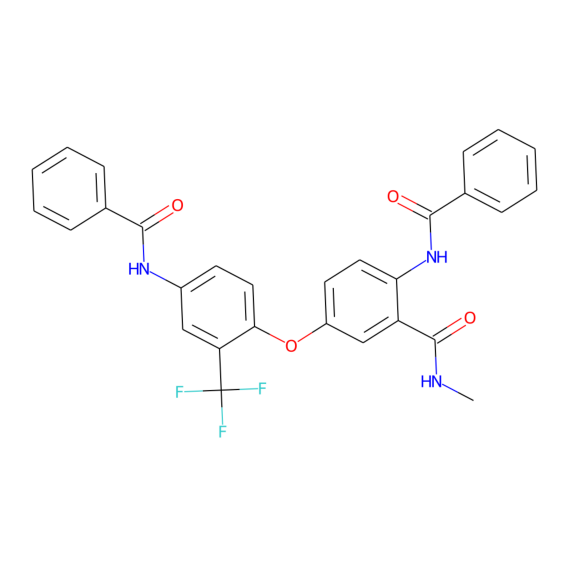

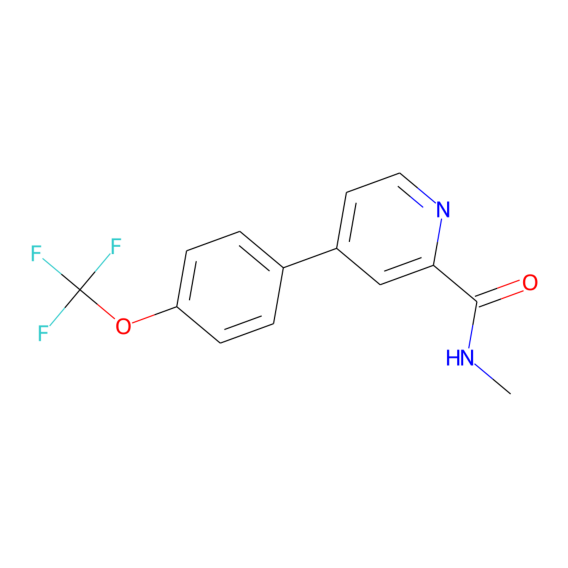

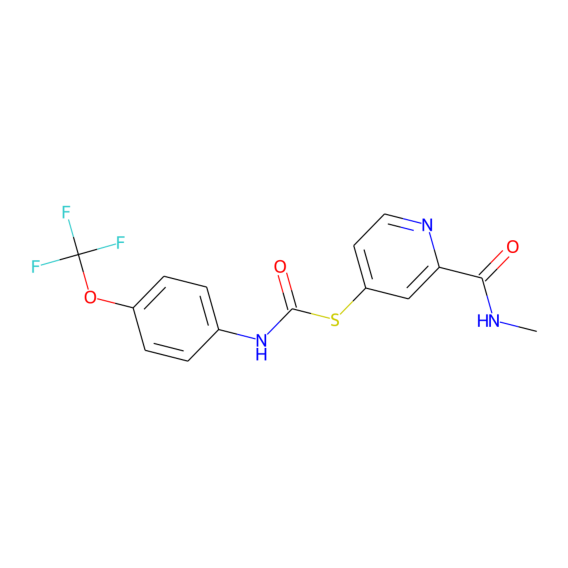

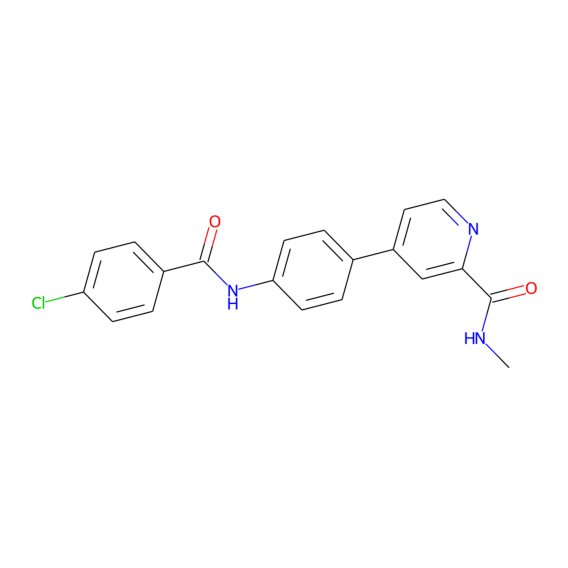

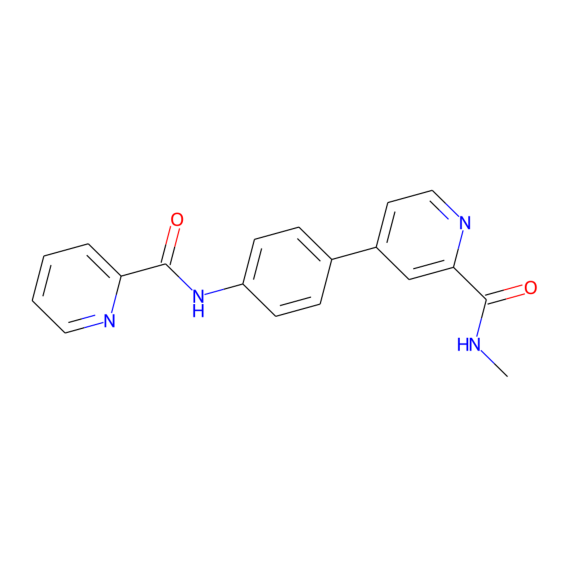

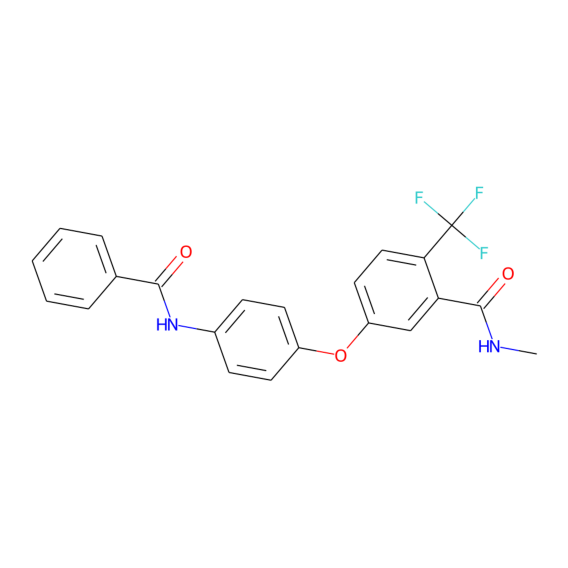

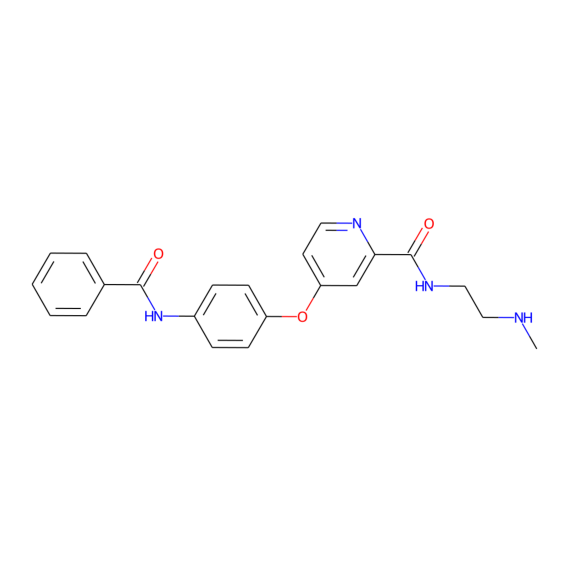

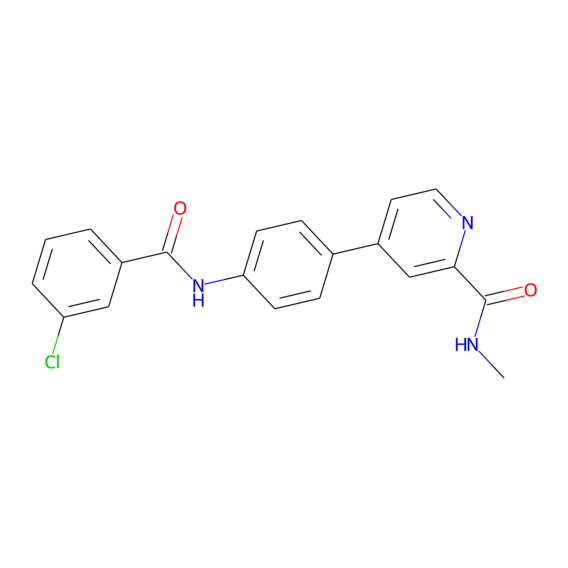

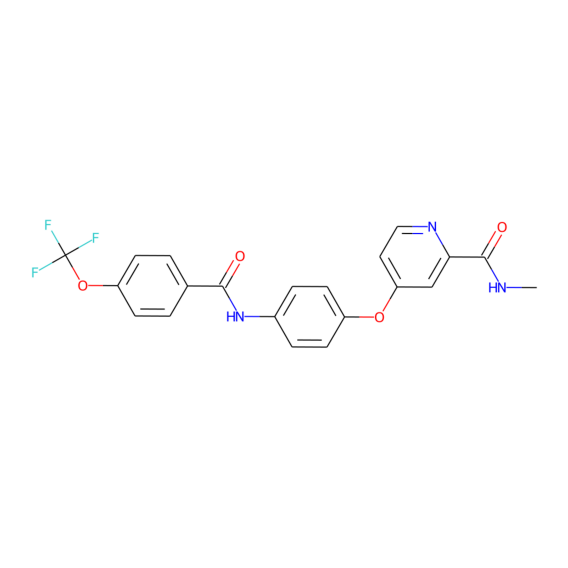

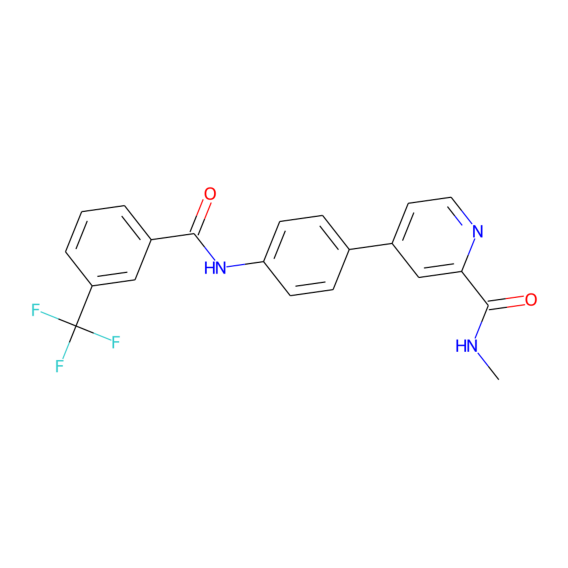

In [10]:
for i in range(1,len(df_hit)+1):
    smi = df_hit.iloc[i,1]
    draw_molecule(smi, filepath=os.path.join(output_dir, f"COMA{i:03d}.png"))
    with open(os.path.join(output_dir, f"COMA{i:03d}.smi"), 'w') as fout:
        fout.write(f"{smi}\n")
    print(f"similarity: {df_hit.loc[i,'TANIMOTO']:.3f}")
    print(f"affinity(ABCG2): {df_hit.loc[i,'affinity(ABCG2)']:.3f}")
    print(f"affinity(BRAF): {df_hit.loc[i,'affinity(BRAF)']:.3f}")

In [18]:
df_hit_ = df_hit.iloc[:,1:].copy()
df_hit_.index = [f"COMA{i:03d}" for i in range(1,len(df_hit)+1)]
df_hit_.index.name = "Name"
df_hit_ = df_hit_.rename(columns={"target":"SMILES"})
df_hit_.to_csv(os.path.join(output_dir, "list_hits.csv"))